In [1]:
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
import numpy as np
import os
from datetime import date
import datetime
from pathlib import Path
import seaborn as sns

In [2]:
caminho = r'Z:\Banco SIVEP Exportação'
lista_arquivos = os.listdir(caminho)
lista_datas = []

for arquivo in lista_arquivos:
    #Descobrir a data desse arquivo
    data = os.path.getmtime(f'{caminho}/{arquivo}')
    lista_datas.append((data,arquivo))

lista_datas.sort(reverse=True) #Vai ordenar a lista em ordem decrescente com reverse=True Obs: Ele ordena sempre com o primeiro valor, por isso colocamos data antes de arquivo
ultimo_arquivo = lista_datas[0][1] #Pega o ultimo arquivo
ultimo_arquivo

'Banco SIVEP 21_11_2022 07_32_59.xlsx'

In [3]:
if not os.path.exists(f'Z:\Graficos Boletim_Python/Gráficos {date.today().day}_{date.today().month}_{date.today().year}'):
    os.makedirs(f'Z:\Graficos Boletim_Python/Gráficos {date.today().day}_{date.today().month}_{date.today().year}')

In [4]:
dados = pd.read_excel(f'{caminho}/{ultimo_arquivo}')
#dados = pd.read_excel('Z:/Banco SIVEP Exportação/Banco SIVEP 30_05_2022 09_48_25.xlsx')

In [5]:
dados['pos_pcrflu'] = dados['pos_pcrflu'].map({1:'Sim',2:'Nao',9:'Ignorado'})

In [6]:
dados['tp_flu_pcr'] = dados['tp_flu_pcr'].map({1:'Influenza',2:'Influenza'})

In [7]:
dados['pcr_fluasu'] = dados['pcr_fluasu'].map({1:'Influenza A(H1N1)pdm09',2:'Influenza A(H3N2)',3:'Influenza A nao subtipado',
4:'Influenza A nao subtipavel',5:'Inconclusivo',6:'Outro'})

In [8]:
filtro = dados[['Competencia Internacao','Houve internacao','Classificacao final','Faixa Etaria','Idade','pos_pcrflu','tp_flu_pcr','pcr_fluasu',"pcr_vsr"]]
filtro['Idade'] = filtro['Idade'].fillna(0)
filtro

C:\Users\ryan-rosa\AppData\Local\Temp\ipykernel_23516\3845840120.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtro['Idade'] = filtro['Idade'].fillna(0)


,Competencia Internacao,Houve internacao,Classificacao final,Faixa Etaria,Idade,pos_pcrflu,tp_flu_pcr,pcr_fluasu,pcr_vsr
0,2021_12,Sim,Não Informado,20-29 anos,22.0,NaN,NaN,NaN,NaN
1,2021_07,Sim,Não Informado,60-69 anos,69.0,NaN,NaN,NaN,NaN
2,NaN,Não Informado,Não Informado,60-69 anos,65.0,NaN,NaN,NaN,NaN
3,2021_02,Sim,COVID-19,50-59 anos,58.0,NaN,NaN,NaN,NaN
4,NaN,Não,COVID-19,80 e mais anos,91.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
184431,2021_02,Sim,COVID-19,80 e mais anos,85.0,Nao,NaN,NaN,NaN
184432,2021_09,Sim,COVID-19,40-49 anos,46.0,NaN,NaN,NaN,NaN
184433,2021_03,Sim,COVID-19,50-59 anos,56.0,NaN,NaN,NaN,NaN
184434,2020_07,Sim,SRAG não especificado,80 e mais anos,85.0,NaN,NaN,NaN,NaN


In [9]:
filtro['Idade'] = filtro['Idade'].astype(int)
filtro.head()

C:\Users\ryan-rosa\AppData\Local\Temp\ipykernel_23516\307549151.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtro['Idade'] = filtro['Idade'].astype(int)


,Competencia Internacao,Houve internacao,Classificacao final,Faixa Etaria,Idade,pos_pcrflu,tp_flu_pcr,pcr_fluasu,pcr_vsr
0,2021_12,Sim,Não Informado,20-29 anos,22,NaN,NaN,NaN,NaN
1,2021_07,Sim,Não Informado,60-69 anos,69,NaN,NaN,NaN,NaN
2,NaN,Não Informado,Não Informado,60-69 anos,65,NaN,NaN,NaN,NaN
3,2021_02,Sim,COVID-19,50-59 anos,58,NaN,NaN,NaN,NaN
4,NaN,Não,COVID-19,80 e mais anos,91,NaN,NaN,NaN,NaN


In [10]:
for index, idade in filtro.iterrows():
    if idade['Idade'] < 12:
        filtro.loc[index,'Idade'] = '0-11 anos'
    elif idade['Idade'] < 20:
        filtro.loc[index,'Idade'] = '12-19 anos'
    elif idade['Idade'] < 40:
        filtro.loc[index,'Idade'] = '20-39 anos'
    elif idade['Idade'] < 60:
        filtro.loc[index,'Idade'] = '40-59 anos'
    elif idade['Idade'] < 80:
        filtro.loc[index,'Idade'] = '60-79 anos'
    elif idade['Idade'] < 150:
        filtro.loc[index,'Idade'] = '80 e mais'

C:\Users\ryan-rosa\AppData\Local\Temp\ipykernel_23516\4269199503.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtro.loc[index,'Idade'] = '20-39 anos'


In [11]:
filtro = filtro.loc[filtro['Houve internacao']=='Sim']
filtro = filtro.loc[filtro['pos_pcrflu']=='Sim']
filtro.head()

,Competencia Internacao,Houve internacao,Classificacao final,Faixa Etaria,Idade,pos_pcrflu,tp_flu_pcr,pcr_fluasu,pcr_vsr
493,2022_01,Sim,SRAG por influenza,60-69 anos,60-79 anos,Sim,Influenza,Influenza A(H3N2),NaN
1332,2022_05,Sim,SRAG por influenza,80 e mais anos,80 e mais,Sim,Influenza,Influenza A(H3N2),NaN
1368,2022_01,Sim,SRAG por influenza,80 e mais anos,80 e mais,Sim,Influenza,Influenza A nao subtipado,NaN
1864,2022_01,Sim,COVID-19,70-79 anos,60-79 anos,Sim,Influenza,Influenza A(H3N2),NaN
2147,2022_01,Sim,SRAG por influenza,70-79 anos,60-79 anos,Sim,Influenza,Influenza A(H3N2),NaN


In [12]:
totalHospitalizacoes = filtro.groupby('Competencia Internacao').count()
totalHospitalizacoes = totalHospitalizacoes.drop('2020_03')
totalHospitalizacoes.head()

,Houve internacao,Classificacao final,Faixa Etaria,Idade,pos_pcrflu,tp_flu_pcr,pcr_fluasu,pcr_vsr
Competencia Internacao,,,,,,,,
2020_01,4,4,4,4,4,4,1,0
2020_02,5,5,5,5,5,5,4,0
2020_05,1,1,1,1,1,1,0,0
2020_06,1,1,1,1,1,1,0,0
2020_10,1,1,1,1,1,1,0,0


In [13]:
separaIdade = filtro.groupby(['Idade','Competencia Internacao']).count()
separaIdade.head()

Houve internacao  Classificacao final  \
Idade     Competencia Internacao                                          
0-11 anos 2020_01                                3                    3   
          2020_02                                1                    1   
          2021_06                                1                    1   
          2021_11                                1                    1   
          2021_12                                6                    6   

                                  Faixa Etaria  pos_pcrflu  tp_flu_pcr  \
Idade     Competencia Internacao                                         
0-11 anos 2020_01                            3           3           3   
          2020_02                            1           1           1   
          2021_06                            1           1           1   
          2021_11                            1           1           1   
          2021_12                            6           6           6   

                                  pcr_fluasu  pcr_vsr  
Idade     Competencia Internacao                       
0-11 anos 2020_01                          0        0  
          2020_02                          0        0  
          2021_06                          1        1  
          2021_11                          1        1  
          2021_12                          6        0

In [14]:
idade11 = separaIdade.reset_index()
idade11 = idade11.loc[idade11['Idade']=='0-11 anos']
idade11 = idade11.set_index('Competencia Internacao')
idade11['Proporcao'] = idade11['Houve internacao']/totalHospitalizacoes['Houve internacao']*100
idade11 = idade11.merge(totalHospitalizacoes,how='outer',right_index=True, left_index=True)
idade11= idade11.fillna(0)
idade11 = idade11['2021_12':]
idade11 = idade11['Proporcao']
idade11.tail(8)

Competencia Internacao
2022_03    35.000000
2022_04    17.460317
2022_05    14.492754
2022_06    15.789474
2022_07    22.222222
2022_08    33.333333
2022_10    42.857143
2022_11     0.000000
Name: Proporcao, dtype: float64

In [15]:
idade19 = separaIdade.reset_index()
idade19 = idade19.loc[idade19['Idade']=='12-19 anos']
idade19 = idade19.set_index('Competencia Internacao')
idade19['Proporcao'] = idade19['Houve internacao']/totalHospitalizacoes['Houve internacao']*100
idade19 = idade19.merge(totalHospitalizacoes,how='outer',right_index=True, left_index=True)
idade19['Proporcao'] = idade19['Proporcao'].fillna(0)
idade19 = idade19['2021_12':]
idade19 = idade19['Proporcao']
idade19.tail(8)

Competencia Internacao
2022_03     0.000000
2022_04     1.587302
2022_05     3.623188
2022_06     4.385965
2022_07     0.000000
2022_08     0.000000
2022_10     0.000000
2022_11    25.000000
Name: Proporcao, dtype: float64

In [16]:
idade39 = separaIdade.reset_index()
idade39 = idade39.loc[idade39['Idade']=='20-39 anos']
idade39 = idade39.set_index('Competencia Internacao')
idade39['Proporcao'] = idade39['Houve internacao']/totalHospitalizacoes['Houve internacao']*100
idade39 = idade39.merge(totalHospitalizacoes,how='outer',right_index=True, left_index=True)
idade39['Proporcao'] = idade39['Proporcao'].fillna(0)
idade39 = idade39.drop(['2020_03'])
idade39= idade39.fillna(0)
idade39 = idade39['2021_12':]
idade39 = idade39['Proporcao']
idade39.tail(8)

Competencia Internacao
2022_03    10.000000
2022_04    14.285714
2022_05    10.869565
2022_06     7.894737
2022_07     8.333333
2022_08    33.333333
2022_10     0.000000
2022_11     0.000000
Name: Proporcao, dtype: float64

In [17]:
idade59 = separaIdade.reset_index()
idade59 = idade59.loc[idade59['Idade']=='40-59 anos']
idade59 = idade59.set_index('Competencia Internacao')
idade59['Proporcao'] = idade59['Houve internacao']/totalHospitalizacoes['Houve internacao']*100
idade59 = idade59.merge(totalHospitalizacoes,how='outer',right_index=True, left_index=True)
idade59 = idade59.drop(['2020_03'])
idade59= idade59.fillna(0)
idade59 = idade59['2021_12':]
idade59 = idade59['Proporcao']
idade59.head(8)

Competencia Internacao
2021_12    18.390805
2022_01    13.186813
2022_02     9.090909
2022_03    20.000000
2022_04    15.873016
2022_05    17.391304
2022_06     9.649123
2022_07    11.111111
Name: Proporcao, dtype: float64

In [18]:
idade79 = separaIdade.reset_index()
idade79 = idade79.loc[idade79['Idade']=='60-79 anos']
idade79 = idade79.set_index('Competencia Internacao')
idade79['Proporcao'] = idade79['Houve internacao']/totalHospitalizacoes['Houve internacao']*100
idade79 = idade79.merge(totalHospitalizacoes,how='outer',right_index=True, left_index=True)
idade79= idade79.fillna(0)
idade79 = idade79['2021_12':]
idade79 = idade79['Proporcao']
idade79.head(8)

Competencia Internacao
2021_12    37.931034
2022_01    46.153846
2022_02    31.818182
2022_03    25.000000
2022_04    36.507937
2022_05    34.782609
2022_06    39.473684
2022_07    41.666667
Name: Proporcao, dtype: float64

In [19]:
idade80 = separaIdade.reset_index()
idade80 = idade80.loc[idade80['Idade']=='80 e mais']
idade80 = idade80.set_index('Competencia Internacao')
idade80['Proporcao'] = idade80['Houve internacao']/totalHospitalizacoes['Houve internacao']*100
idade80 = idade80.merge(totalHospitalizacoes,how='outer',right_index=True, left_index=True)
idade80= idade80.fillna(0)
idade80 = idade80['2021_12':]
idade80 = idade80['Proporcao']
idade80.tail(8)

Competencia Internacao
2022_03    10.000000
2022_04    14.285714
2022_05    18.840580
2022_06    22.807018
2022_07    16.666667
2022_08     0.000000
2022_10    14.285714
2022_11    25.000000
Name: Proporcao, dtype: float64

In [20]:
competencia = idade80.to_frame()
competencia = competencia.reset_index()
competencia = competencia['Competencia Internacao']
competencia.tail()

6     2022_06
7     2022_07
8     2022_08
9     2022_10
10    2022_11
Name: Competencia Internacao, dtype: object

In [21]:
legenda = pd.DataFrame(columns=['0-11','12-19','20-39','40-59','60-79','80 e mais'])

In [22]:
pasta = r'Z:\Graficos Boletim_Python'
lista_arquivos = os.listdir(pasta)
lista_datas = []

for arquivo in lista_arquivos:
    #Descobrir a data desse arquivo
    data = os.path.getmtime(f'{pasta}/{arquivo}')
    lista_datas.append((data,arquivo))

lista_datas.sort(reverse=True) #Vai ordenar a lista em ordem decrescente com reverse=True Obs: Ele ordena sempre com o primeiro valor, por isso colocamos data antes de arquivo
ultima_pasta = lista_datas[0][1] #Pega o ultimo arquivo
ultima_pasta

'Gráficos 21_11_2022'

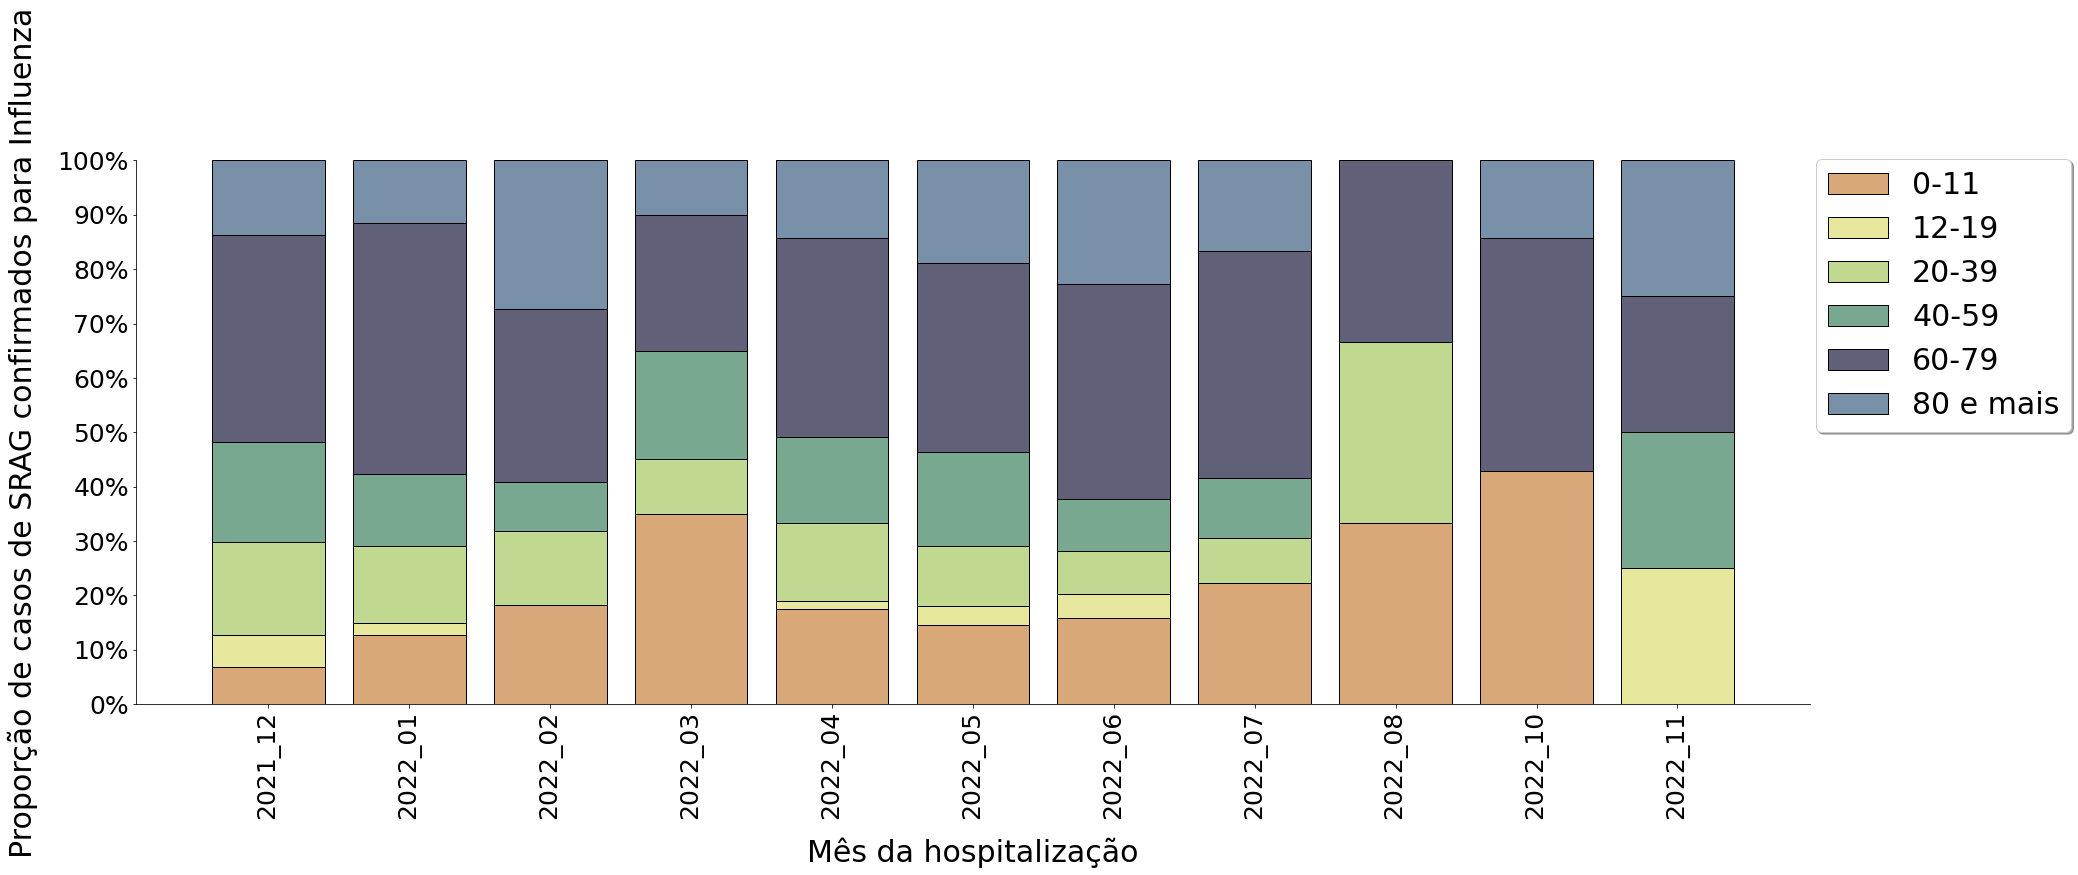

In [23]:
plt.figure(figsize=(30,10))
plt.bar(competencia,idade11, color='#d8a878',edgecolor='#000000')
plt.bar(competencia,idade19, bottom=idade11, color="#e7e79d",edgecolor='#000000')
plt.bar(competencia,idade39, bottom=idade11 + idade19, color='#c0d890',edgecolor='#000000')
plt.bar(competencia,idade59, bottom=np.array(idade11) + np.array(idade19) + np.array(idade39), color='#78a890',edgecolor='#000000')
plt.bar(competencia,idade79, bottom=idade11 + idade19 + idade39 + idade59, color='#606078',edgecolor='#000000')
plt.bar(competencia,idade80, bottom=idade11 + idade19 + idade39 + idade59 + idade79, color='#7890a8',edgecolor='#000000')
sns.despine()
plt.xticks(rotation=90,fontsize=25)
plt.xlabel('Mês da hospitalização',fontsize=30,labelpad=18)
plt.yticks(np.arange(0,110,10),fontsize=25)
plt.ylabel('Proporção de casos de SRAG confirmados para Influenza',fontsize=30,labelpad=20)
plt.gca().set_yticklabels(['{:.0f}%'.format(x*1) for x in plt.gca().get_yticks()])
plt.legend(legenda,loc='upper center',fancybox=True,bbox_to_anchor=(1.08,1.03),fontsize=30,shadow=True)
plt.savefig(f'Z:/Graficos Boletim_Python/{ultima_pasta}/prporcaoHosp_Influ.jpeg',dpi=720,bbox_inches='tight')